# Bài tập Naive Bayes

## Sử dụng MultinomialNB để phân nhóm cho tập News dataset
- dataset: 'uci-news.csv'
- Dựa vào `Title` để phân loại, các cột khác bỏ


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

There are no 'uci-news.csv' file on lab folder, so I use 'uci-news-aggregator.csv' from https://www.kaggle.com/datasets/uciml/news-aggregator-dataset?resource=download

In [2]:
#df = pd.read_csv('uci-news.csv')

df = pd.read_csv('uci-news.zip', compression='zip')

In [3]:
df.head()

,ID,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP
0,1,"Fed official says weak data caused by weather,...",http://www.latimes.com/business/money/la-fi-mo...,Los Angeles Times,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.latimes.com,1394470370698
1,2,Fed's Charles Plosser sees high bar for change...,http://www.livemint.com/Politics/H2EvwJSK2VE6O...,Livemint,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.livemint.com,1394470371207
2,3,US open: Stocks fall after Fed official hints ...,http://www.ifamagazine.com/news/us-open-stocks...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371550
3,4,"Fed risks falling 'behind the curve', Charles ...",http://www.ifamagazine.com/news/fed-risks-fall...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371793
4,5,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,http://www.moneynews.com/Economy/federal-reser...,Moneynews,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.moneynews.com,1394470372027


In [4]:
df = df.drop(columns=['ID', 'URL', 'PUBLISHER', 'STORY', 'HOSTNAME', 'TIMESTAMP'])

In [5]:
df.shape

(422419, 2)

In [6]:
df.head()

,TITLE,CATEGORY
0,"Fed official says weak data caused by weather,...",b
1,Fed's Charles Plosser sees high bar for change...,b
2,US open: Stocks fall after Fed official hints ...,b
3,"Fed risks falling 'behind the curve', Charles ...",b
4,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,b


In [7]:
count_class = df.groupby('CATEGORY').count()
count_class

,TITLE
CATEGORY,
b,115967
e,152469
m,45639
t,108344


<Axes: title={'center': 'Number of news in each category'}, xlabel='CATEGORY'>

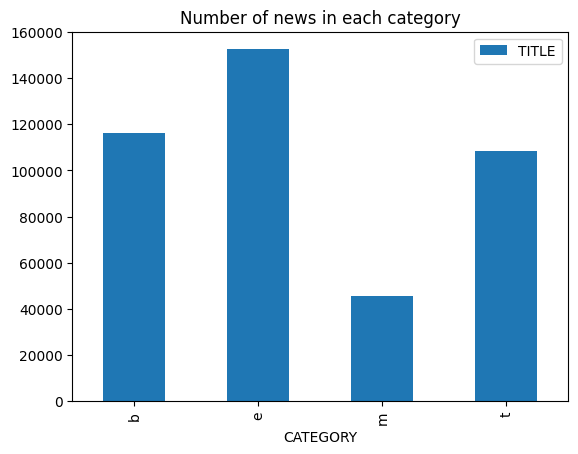

In [8]:
count_class.plot(kind='bar', title='Number of news in each category')

### remove stopwords

In [9]:
from sklearn import feature_extraction
import numpy as np

f = feature_extraction.text.CountVectorizer(stop_words = 'english')
X = f.fit_transform(df['TITLE'])
np.shape(X)

(422419, 54345)

In [10]:
from sklearn import model_selection
#split training/test set
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, df['CATEGORY'], test_size=0.33, random_state=42)
print([np.shape(X_train), np.shape(X_test)])

[(283020, 54345), (139399, 54345)]


## Train data

In [11]:
from sklearn import naive_bayes, metrics

list_alpha = np.arange(1/100000, 20, 0.11)
score_train = np.zeros(len(list_alpha))
score_test = np.zeros(len(list_alpha))
recall_test = np.zeros(len(list_alpha))
precision_test= np.zeros(len(list_alpha))
count = 0
for alpha in list_alpha:
    bayes = naive_bayes.MultinomialNB(alpha=alpha)
    bayes.fit(X_train, y_train)
    score_train[count] = bayes.score(X_train, y_train)
    score_test[count]= bayes.score(X_test, y_test)
    recall_test[count] = metrics.recall_score(y_test, bayes.predict(X_test), average='macro')
    precision_test[count] = metrics.precision_score(y_test, bayes.predict(X_test), average='macro')
    count = count + 1

In [12]:
matrix = np.matrix(np.c_[list_alpha, score_train, score_test, recall_test, precision_test])
models = pd.DataFrame(data = matrix, columns =
             ['alpha', 'Train Accuracy', 'Test Accuracy', 'Test Recall', 'Test Precision'])
models.head(n=10)

,alpha,Train Accuracy,Test Accuracy,Test Recall,Test Precision
0,0.00001,0.948714,0.921312,0.915643,0.917497
1,0.11001,0.943891,0.929512,0.926514,0.924461
2,0.22001,0.942209,0.929383,0.926451,0.924021
3,0.33001,0.941008,0.929175,0.926105,0.923702
4,0.44001,0.940068,0.928730,0.925462,0.923205
5,0.55001,0.939308,0.928364,0.924782,0.923047
6,0.66001,0.938640,0.928170,0.924357,0.922949
7,0.77001,0.938153,0.927711,0.923599,0.922602
8,0.88001,0.937573,0.927352,0.922960,0.922245
9,0.99001,0.937033,0.927073,0.922505,0.922161


In [13]:
best_index = models['Test Precision'].idxmax()
models.iloc[best_index, :]

alpha             0.110010
Train Accuracy    0.943891
Test Accuracy     0.929512
Test Recall       0.926514
Test Precision    0.924461
Name: 1, dtype: float64

In [14]:
models[models['Test Precision']>=0.924461].head(n=5)

,alpha,Train Accuracy,Test Accuracy,Test Recall,Test Precision
1,0.11001,0.943891,0.929512,0.926514,0.924461


In [15]:
bayes = naive_bayes.MultinomialNB(alpha=list_alpha[best_index])
bayes.fit(X_train, y_train)
models.iloc[best_index, :]

alpha             0.110010
Train Accuracy    0.943891
Test Accuracy     0.929512
Test Recall       0.926514
Test Precision    0.924461
Name: 1, dtype: float64

              precision    recall  f1-score   support

           b       0.91      0.91      0.91     38361
           e       0.97      0.96      0.97     50242
           m       0.92      0.93      0.92     15002
           t       0.90      0.91      0.91     35794

    accuracy                           0.93    139399
   macro avg       0.92      0.93      0.93    139399
weighted avg       0.93      0.93      0.93    139399



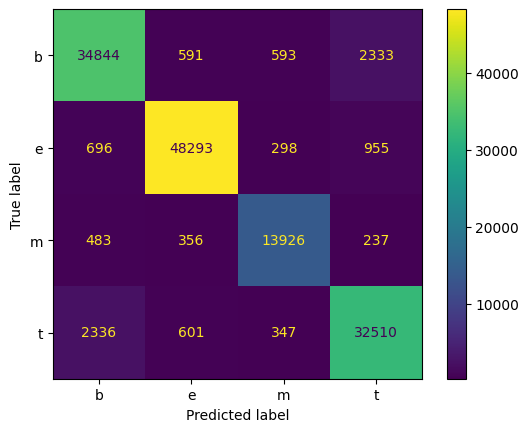

In [23]:
from sklearn.metrics import ConfusionMatrixDisplay,classification_report, PrecisionRecallDisplay

preds = bayes.predict(X_test)
m_confusion_test = metrics.confusion_matrix(y_test, preds)
print(classification_report(y_test,preds))
disp = ConfusionMatrixDisplay(confusion_matrix=m_confusion_test, display_labels=bayes.classes_)
disp.plot()